In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'D:\GOALS\PROFESSIONS\DATA ANALYST\DATASETS\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv' , encoding = 'unicode_escape')

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
df.shape

(11251, 15)

In [14]:
df.tail(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11241,1003032,Matthias,P00058042,F,26-35,33,0,Delhi,Central,Hospitality,Office,3,384.0,NaN,NaN
11242,1004344,Hildebrand,P00185442,F,26-35,27,1,Delhi,Central,Healthcare,Office,2,382.0,NaN,NaN
11243,1005446,Sheetal,P00297742,M,51-55,53,0,Gujarat,Western,Healthcare,Office,1,382.0,NaN,NaN
11244,1005446,Sheetal,P00297742,M,51-55,53,0,Madhya Pradesh,Central,Healthcare,Office,2,382.0,NaN,NaN
11245,1004140,Bertelson,P00057442,F,26-35,31,1,Delhi,Central,Aviation,Office,2,381.0,NaN,NaN
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
df.drop(['Status','unnamed1'] , axis = 1 , inplace = True)

In [19]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
df.dropna(inplace = True)

In [21]:
df['Amount'] = df['Amount'].astype('int')

In [22]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

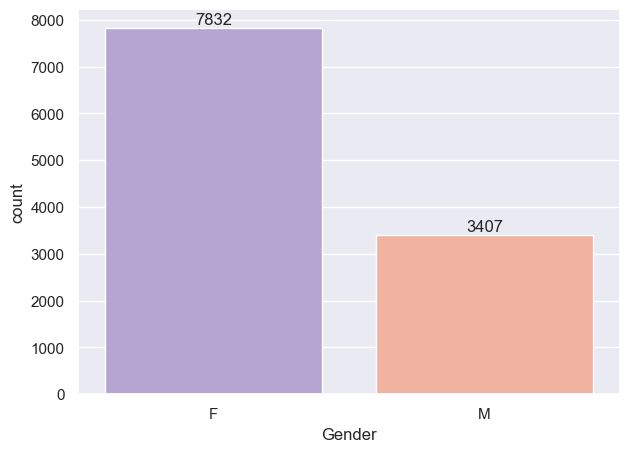

In [101]:
# Count of each gender

axis = sns.countplot(x = 'Gender',data = df , palette = ['#B39DDB' , '#FFAB91'])

for bars in axis.containers:
    axis.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

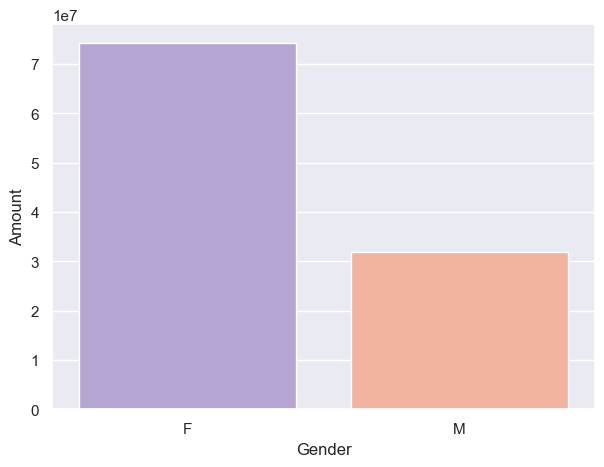

In [102]:
# Gender V/S Amount Spent

sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gender ,palette = ['#B39DDB' , '#FFAB91'])

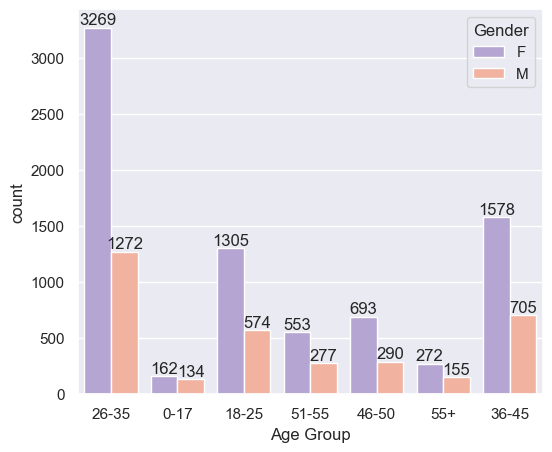

In [105]:
# Count from each Age Group

axis = sns.countplot(data = df, x = 'Age Group', hue = 'Gender' , palette = ['#B39DDB' , '#FFAB91'])

for bars in axis.containers:
    axis.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

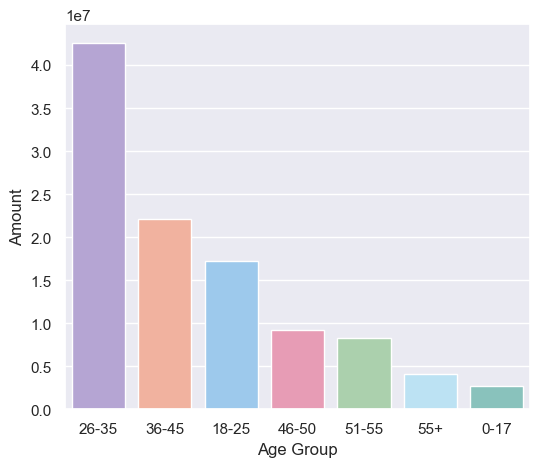

In [106]:
# Age Group V/S Amount Spent

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

<Axes: xlabel='State', ylabel='Orders'>

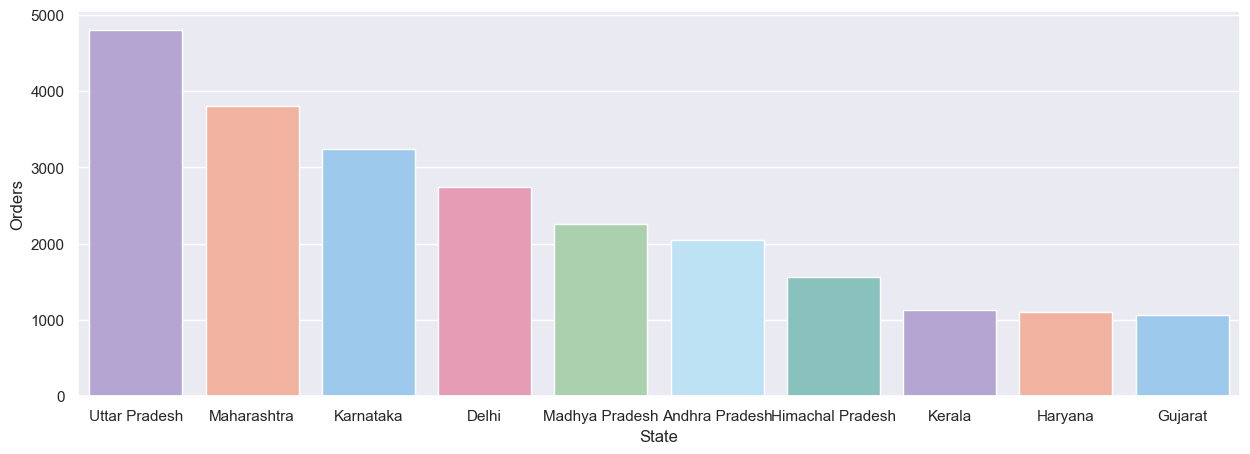

In [82]:
# Orders V/S Top 10 States

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

<Axes: xlabel='State', ylabel='Amount'>

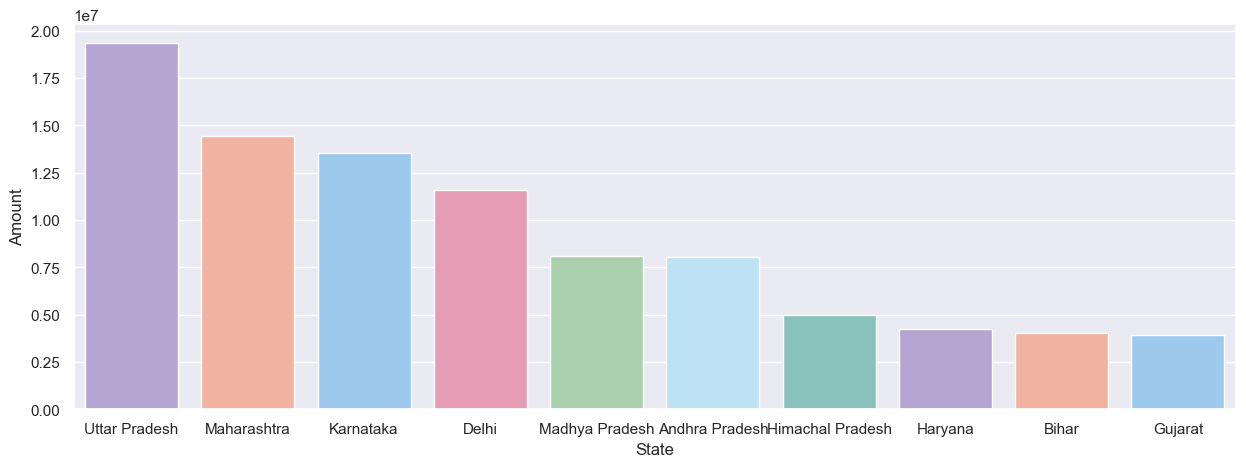

In [83]:
# Sales V/S Top 10 States

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

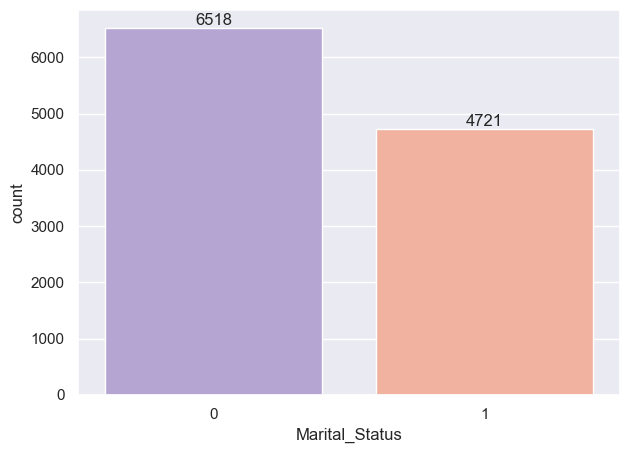

In [103]:
# Martial_Status Count

ax = sns.countplot(data = df, x = 'Marital_Status' , palette = ['#B39DDB' , '#FFAB91'])

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

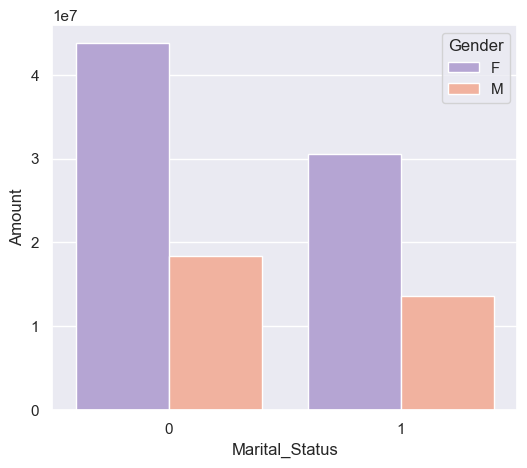

In [104]:
# Marital_Status and Gender V/S Amount

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender' , palette = ['#B39DDB' , '#FFAB91'] )

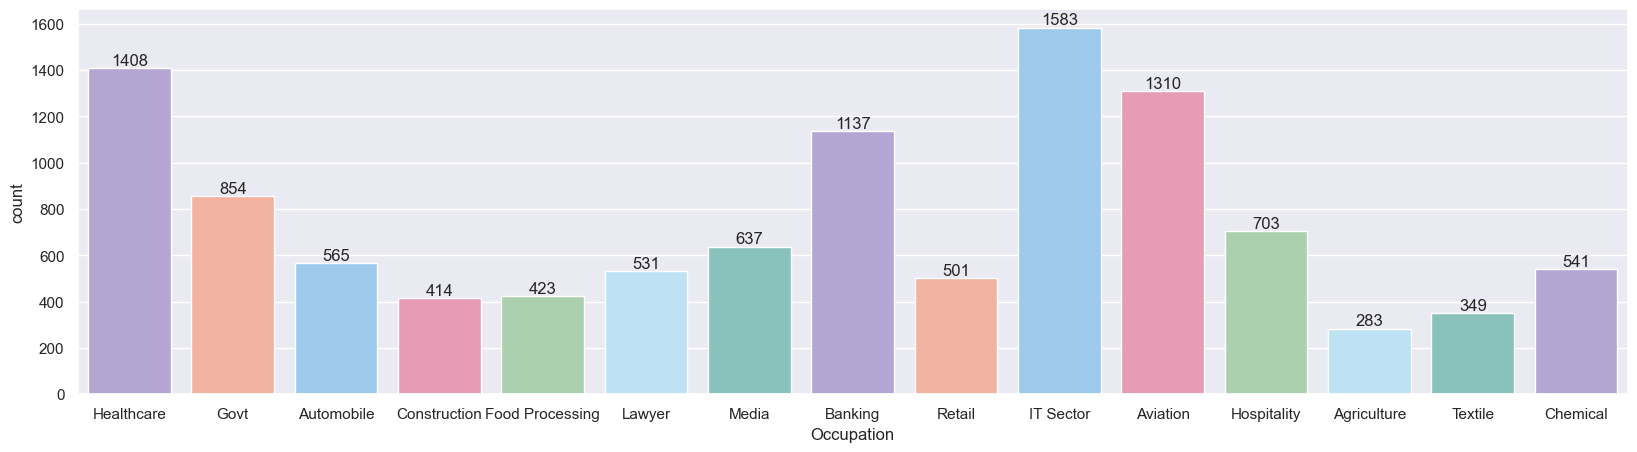

In [90]:
E# Count of Occupation

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

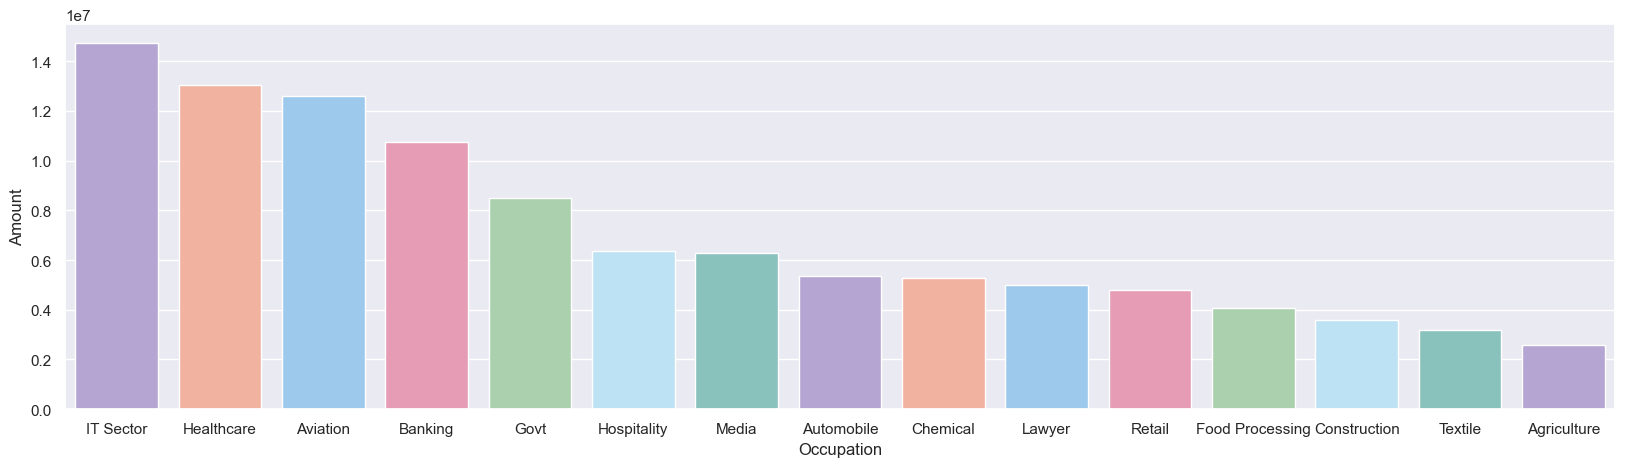

In [91]:
# Occupation V/S Amount

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

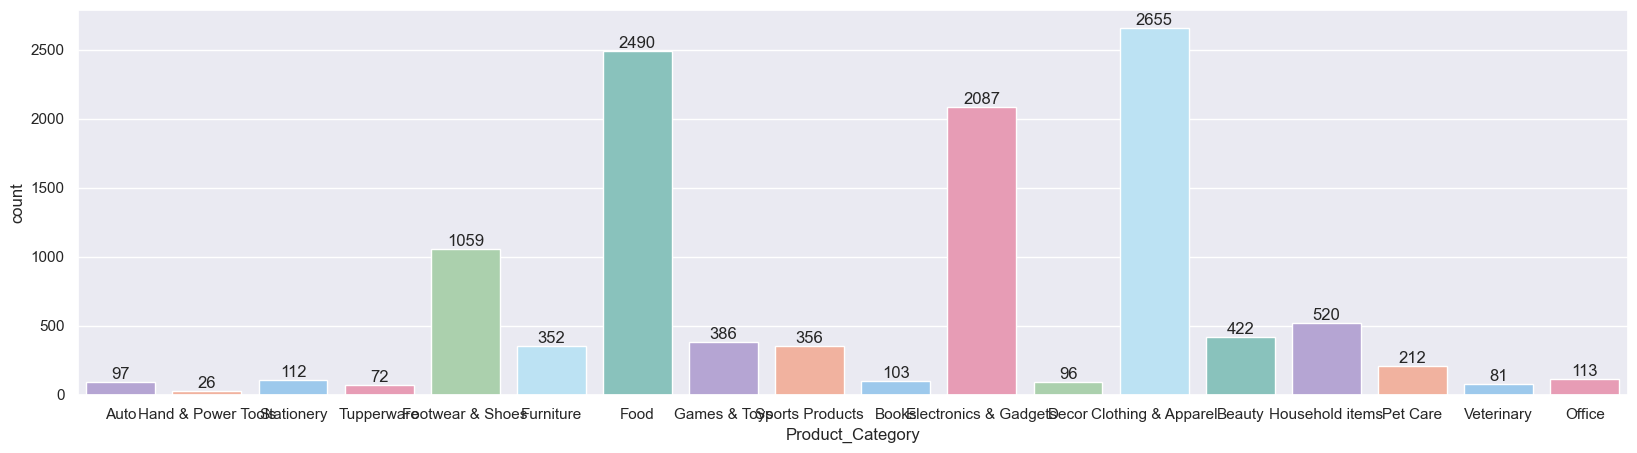

In [93]:
# Count of Product_Category

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

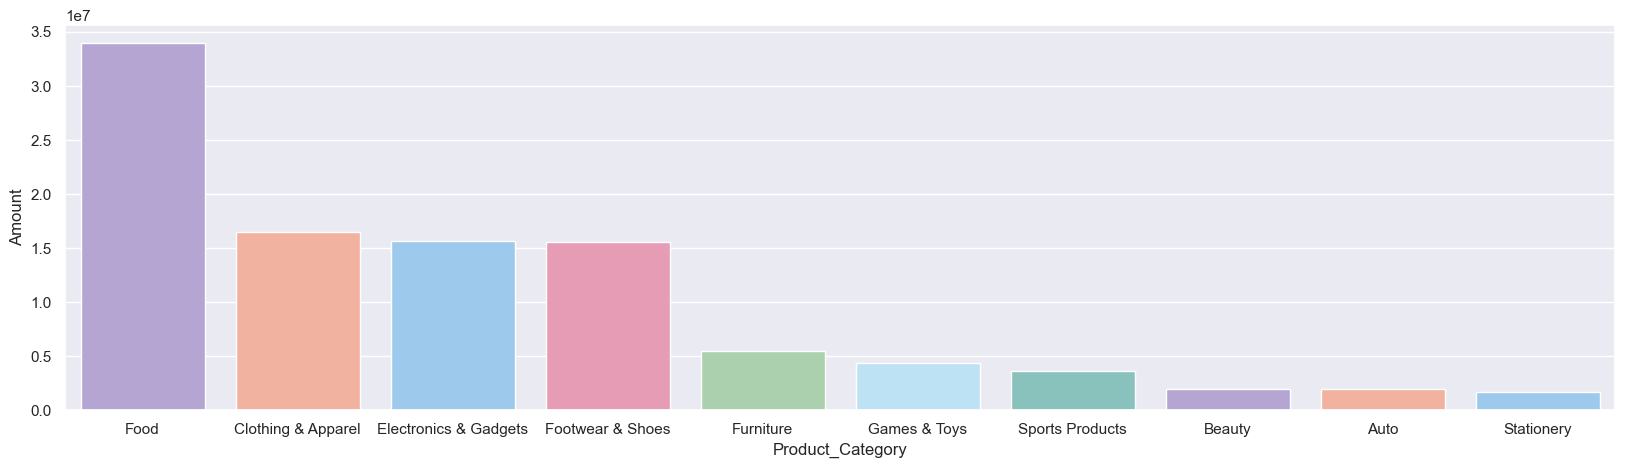

In [95]:
# Amount V/S Top 10 Product_Category

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

<Axes: xlabel='Product_ID', ylabel='Orders'>

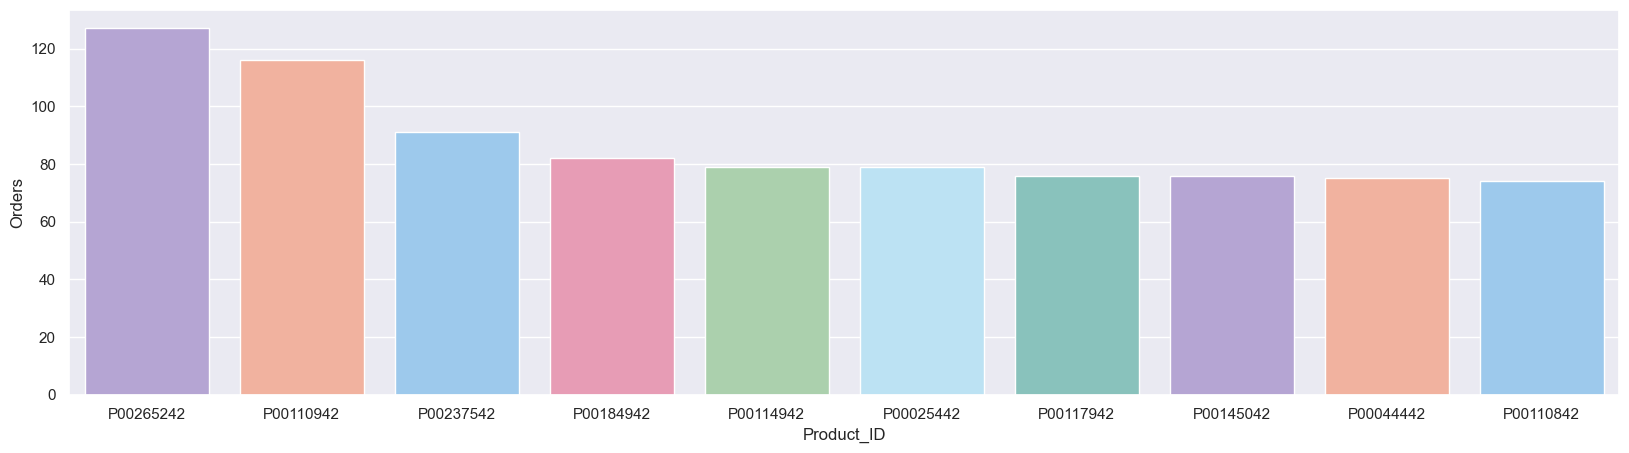

In [96]:
# Orders V/S Top 10 Product_Ids

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders' , palette = ['#B39DDB' , '#FFAB91' , '#90CAF9' , '#F48FB1' , '#A5D6A7' , '#B3E5FC' , '#80CBC4'])

<h3 style="color:purple;">INSIGHTS</h3>

<ul>
  <li style="color:teal;">Married Women of age group 25-36 purchased more than all others</li>
  <li style="color:teal;">Working employees of IT Sector, Healthcare, Aviation purchase more</li>
  <li style="color:teal;">Uttar Pradesh, Maharashtra, and Karnataka are the Top 3 States with highest sales</li>
  <li style="color:teal;">Food, Clothing, and Electronics are the most purchased categories</li>
</ul>


<h3 style="color:purple;">CONCLUSIONS</h3>

<p style="color:teal;">
Married women of age group 25–36, working in IT, Healthcare, and Aviation sectors from Uttar Pradesh, Maharashtra, and Karnataka, purchase more in Food, Clothing, and Electronics categories.
</p>
